In [2]:
import numpy as np
import pandas as pd
from collections import defaultdict
import networkx as nx
#from nxviz.plots import CircosPlot
import operator
from operator import itemgetter
import pandas as pd
from PIL import Image
import networkx as nx
from matplotlib import pyplot, patches,axes
import matplotlib.pyplot as plt
import os
from collections import defaultdict
from glob import glob
import seaborn as sns
import scipy
from nilearn import plotting
import nibabel as nib
from brainspace.utils.parcellation import map_to_labels, relabel
from nilearn.surface import vol_to_surf
from nilearn import datasets 
from nilearn.connectome import ConnectivityMeasure
from nilearn.datasets import MNI152_FILE_PATH
from nilearn import plotting
from nilearn.interfaces.fmriprep import load_confounds_strategy
import nibabel as nib
from brainspace.gradient import GradientMaps
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_group_fc, load_parcellation, load_conte69
import copy


#### Function

In [3]:
def cut_cerebellum(matrix):
    # remove cerebellum 
    matrix_ = []
    for i in range(len(matrix)):
        matrix_.append(np.delete(matrix[i],[14,15,16]))
    return matrix_

In [4]:
def normalize_series(series, axis=None):
    """
    Normalizes the input series along the specified axis.
    
    Parameters:
    series (numpy.ndarray): Input array to be normalized.
    axis (int or None): Axis along which to compute the mean and std. 
                        If None, the entire array is normalized as a whole.
    
    Returns:
    numpy.ndarray: Normalized array.
    """
    mean = np.mean(series, axis=axis, keepdims=True)  # 특정 axis를 기준으로 평균 계산
    std = np.std(series, axis=axis, keepdims=True)    # 특정 axis를 기준으로 표준편차 계산
    normalized_series = (series - mean) / std
    return normalized_series


In [2]:
mat_file_name = "/camin1/yrjang/HCP_data/HCP/timeseries/100206.mat"
mat_file = scipy.io.loadmat(mat_file_name)

In [3]:
mat_file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Feb  3 23:28:56 2023',
 '__version__': '1.0',
 '__globals__': [],
 'FC_ts': array([[(array([[(array([[13525.08096427, 12353.3468998 , 12952.12265082, ...,
                         11236.05875472, 10718.11059132, 12193.89074883],
                        [13681.6933015 , 12385.36924758, 12955.77897761, ...,
                         11276.90089232, 10787.96234679, 12175.35485054],
                        [13241.95951244, 12523.28143911, 12978.14258282, ...,
                         11281.98762663, 10732.89888777, 12209.93313596],
                        ...,
                        [13545.34755859, 12526.78252728, 13106.47347251, ...,
                         11290.47365696, 10842.34998947, 12297.76335198],
                        [13427.06399016, 12545.4258448 , 13093.96553861, ...,
                         11266.53764863, 10859.73683103, 12225.78780545],
                        [13324.78562645, 12418.36556765, 1305

In [6]:
mat_file = []
mat_file_name = "/camin2/Database/HCP/DATA_S1200_retest/"
file_list = os.listdir(mat_file_name)
file_list_py = [file for file in file_list if file.endswith('_3T_rfMRI_REST_fix.zip')]

In [9]:
import shutil
import os


# 파일을 복사할 목적지 폴더 경로
destination_folder = '/camin1/yrjang/HCP_data/HCP/retest/'

# 각 파일을 목적지 폴더로 복사
for file in file_list_py:
    shutil.copy(mat_file_name+file, destination_folder)
    print(f'{file} has been copied to {destination_folder}')
    

135528_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
172332_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
287248_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
149741_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
143325_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
175439_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
139839_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
917255_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
783462_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
627549_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
562345_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/retest/
200614_3T_rfMRI_REST_fix.zip has been copied to /camin1/yrjang/HCP_data/HCP/

#### Load file

In [4]:
mat_file_name = "/camin1/yrjang/HCP_data/HCP/timeseries/"
file_list = os.listdir(mat_file_name)
file_list_py = [file for file in file_list if file.endswith('.mat')]

In [5]:
mat_file = []
mat_file_name = "/data/camin/yrjang/HCP_data/HCP/timeseries/"
file_list = os.listdir(mat_file_name)
file_list_py = [file for file in file_list if file.endswith('.mat')]
for i in file_list_py[:200]:
    print(i)
    mat_file_ = scipy.io.loadmat(mat_file_name + i)
    mat_file.append(mat_file_)

100206.mat
100307.mat
100408.mat
164939.mat
144226.mat
122822.mat
100610.mat
165032.mat
144428.mat
123117.mat
101006.mat
165436.mat
123420.mat
144731.mat
101107.mat
165638.mat
123521.mat
144832.mat
101309.mat
165840.mat
123723.mat
144933.mat
101915.mat
165941.mat
123824.mat
145127.mat
102008.mat
166438.mat
123925.mat
145632.mat
102109.mat
166640.mat
124220.mat
145834.mat
102311.mat
167036.mat
124422.mat
146129.mat
102513.mat
167238.mat
124624.mat
146331.mat
102614.mat
167440.mat
124826.mat
146432.mat
102715.mat
167743.mat
125222.mat
146533.mat
102816.mat
168139.mat
125424.mat
146735.mat
103010.mat
168240.mat
125525.mat
146836.mat
103111.mat
168341.mat
126325.mat
146937.mat
103212.mat
168745.mat
126426.mat
147030.mat
103414.mat
168947.mat
126628.mat
147636.mat
103515.mat
169040.mat
127226.mat
147737.mat
103818.mat
169343.mat
127327.mat
148032.mat
104012.mat
169444.mat
127630.mat
148133.mat
104416.mat
169545.mat
127731.mat
148335.mat
104820.mat
169747.mat
127832.mat
148436.mat
105014.mat

#### Load 300 HCP subject

In [9]:
hcp_300_list = []

hcp_txt = open('HCP_sbj_ls_302.txt','r')
for i in hcp_txt:
    hcp_300_list.append(i.strip())


In [10]:
len(hcp_300_list) 
hcp_300_list = [i+'.mat' for i in hcp_300_list]

In [11]:
mat_file = []
mat_file_name = "/camin1/yrjang/HCP_data/HCP/timeseries/"

for i in hcp_300_list:
    print(i)
    mat_file_ = scipy.io.loadmat(mat_file_name + i)
    mat_file.append(mat_file_)

101309.mat
101915.mat
102008.mat
102109.mat
102614.mat
102715.mat
103111.mat
103414.mat
105216.mat
105620.mat
108222.mat
108525.mat
109830.mat
110613.mat
111716.mat
112314.mat
113215.mat
114621.mat
115724.mat
117122.mat
117324.mat
118124.mat
118730.mat
118932.mat
119126.mat
119732.mat
120515.mat
121416.mat
121921.mat
123420.mat
124624.mat
125222.mat
126628.mat
127630.mat
129129.mat
129634.mat
130821.mat
131924.mat
132017.mat
134223.mat
135225.mat
136126.mat
136227.mat
136833.mat
137633.mat
138130.mat
138332.mat
138534.mat
140319.mat
142828.mat
144125.mat
144832.mat
146836.mat
148335.mat
149236.mat
149539.mat
149842.mat
150625.mat
151324.mat
151627.mat
152225.mat
152427.mat
153025.mat
153631.mat
154229.mat
154330.mat
154734.mat
155635.mat
156031.mat
156233.mat
156536.mat
157437.mat
157942.mat
158338.mat
158540.mat
158843.mat
159744.mat
159946.mat
160931.mat
161731.mat
162228.mat
162329.mat
163331.mat
164939.mat
168139.mat
169545.mat
170631.mat
172534.mat
173435.mat
173637.mat
173738.mat

In [10]:
np.save('/camin1/yrjang/HCP_data/302subject.npy',mat_file)

: 

In [8]:
mat_file_name = "/camin1/yrjang/HCP_data/HCP/timeseries/"

In [6]:
mat_file = np.load('/camin1/yrjang/HCP_data/302subject.npy', allow_pickle=True)

EOFError: Ran out of input

### Load subject info

In [7]:
# 파일명
file_name = '/camin2/Database/HCP/S1200_total.xlsx'
pd.set_option('display.max_columns', None)

# Daraframe형식으로 엑셀 파일 읽기
df = pd.read_excel(file_name,engine='openpyxl')

In [8]:
temp = df.to_numpy()

In [12]:
phenoInfos = {}
for row in temp:
    phenoInfos[str(row[0])] = {"age" : row[1], "gender" : row[2]}

In [13]:
data = scipy.io.loadmat(mat_file_name + hcp_300_list[78])

In [14]:
len(data['FC_ts'][0][0])

3

In [31]:
roi = 3
hcp_300_list_= copy.deepcopy(hcp_300_list)
first_seg = hcp_300_list_[:150]
second_seg = hcp_300_list_[150:]

for num,hcp_list in enumerate([first_seg, second_seg]):
    dataset=[]
    for i, mat_file in enumerate(hcp_list):
        print(i)
        data = scipy.io.loadmat(mat_file_name + mat_file)

        if len(data['FC_ts'][0][0]) != 4:
            print("error : ", mat_file)
            del hcp_300_list[i]
            continue

        # extract Schaefer300 - session 1,2 (LR,RL)
        s1_LR = data['FC_ts'][0][0][0][0][0][roi+2]
        s1_RL = data['FC_ts'][0][0][1][0][0][roi+2]
        s2_LR = data['FC_ts'][0][0][2][0][0][roi+2]
        s2_RL = data['FC_ts'][0][0][3][0][0][roi+2]
        
        # cut 17
        s1_LR_= cut_cerebellum(s1_LR)
        s1_RL_= cut_cerebellum(s1_RL)
        s2_LR_= cut_cerebellum(s2_LR)
        s2_RL_= cut_cerebellum(s2_RL)
        
        nmal_s1_LR = normalize_series(s1_LR_,axis=0)
        nmal_s1_RL = normalize_series(s1_RL_,axis=0)
        nmal_s2_LR = normalize_series(s2_LR_,axis=0)
        nmal_s2_RL = normalize_series(s2_RL_,axis=0)
        
        roiTimeseries = np.concatenate([nmal_s1_LR,nmal_s1_RL,nmal_s2_LR,nmal_s2_RL])
        subjectId = mat_file.split(".")[0]
        
        dataset.append({
                    "roiTimeseries": roiTimeseries,
                    "pheno": {"subjectId" : subjectId , **phenoInfos[subjectId ]}})
        
    np.save('/camin1/yrjang/HCP_data/HCP_s300_data_seg{}.npy'.format(num),dataset)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
error :  160931.mat
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


/home/yrjang/.conda/envs/yr_node1/lib/python3.8/site-packages/nilearn/plotting/matrix_plotting.py:325: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


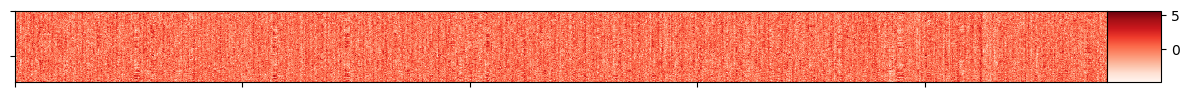

In [32]:
corr_plot = plotting.plot_matrix(np.array(roiTimeseries).T, figure=(12, 5), labels=None, cmap='Reds')

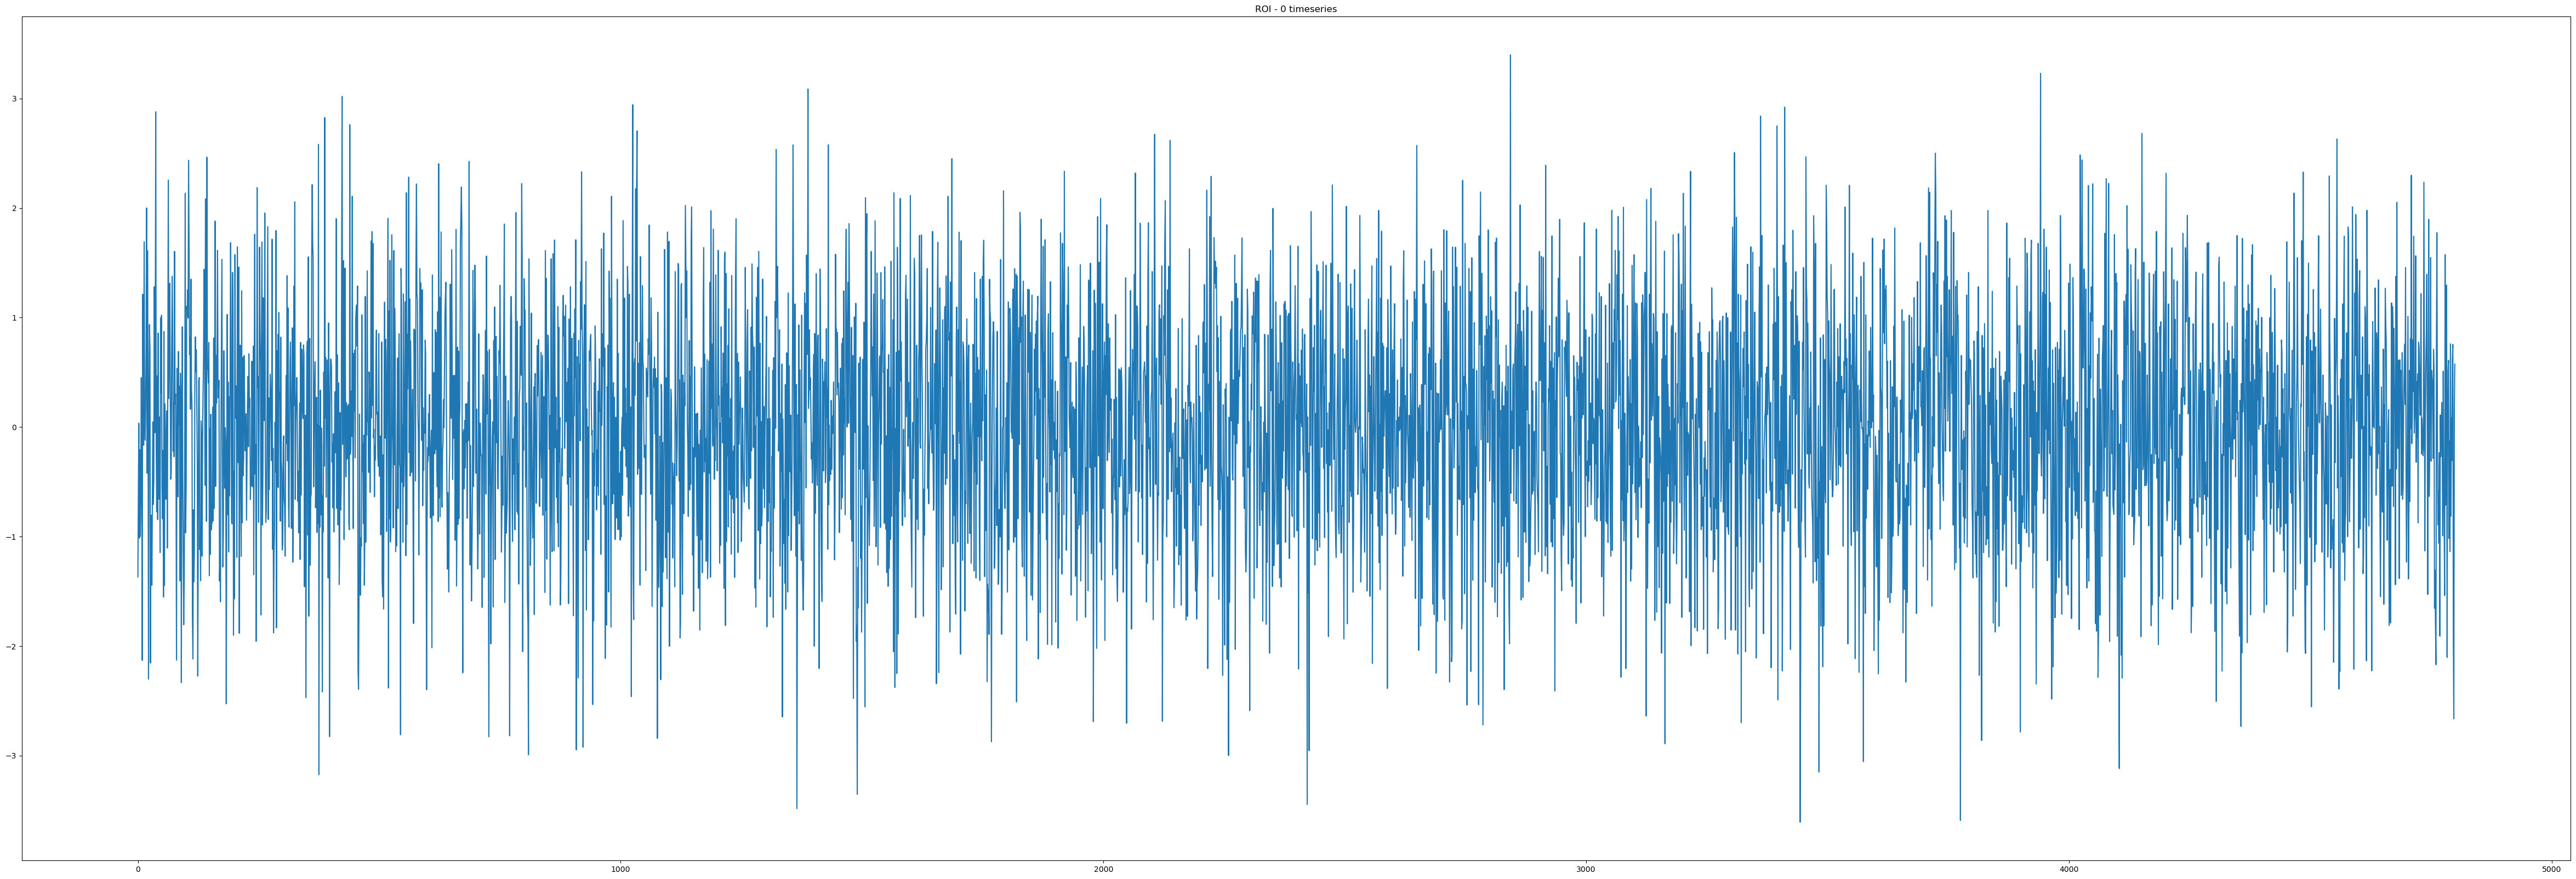

In [33]:
x = np.arange(0,4800)
y = np.array(roiTimeseries).T[0]

plt.figure(figsize=(60,20))
plt.plot(x,y)
plt.title("ROI - 0 timeseries")
plt.show()

In [5]:
dataset_1 = np.load('/camin1/yrjang/HCP_data/HCP_s300_data_seg0.npy', allow_pickle=True)
dataset_2 = np.load('/camin1/yrjang/HCP_data/HCP_s300_data_seg1.npy', allow_pickle=True)

dataset = np.concatenate((dataset_1, dataset_2), axis=0)    

data_x = []

for data in dataset:
    data_x.append(data['roiTimeseries'])

data_x = np.array(data_x)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (301,) + inhomogeneous part.

In [11]:
for num,i in enumerate(data_x):
    if i.shape != (4800, 314):
        print(i.shape)
        print(num)

(4306, 314)
25
(4713, 314)
77
(4771, 314)
165


In [15]:
data['roiTimeseries'].shape

(4800, 314)

In [12]:
del_list = [25,77,165]

In [14]:
del data_x[25]

In [33]:
np.save('/data/camin/yrjang/HCP_data/HCP_nor_300_data_sub200.npy',dataset)

### Only one session

In [ ]:
roi = 3
hcp_300_list_= copy.deepcopy(hcp_300_list)
first_seg = hcp_300_list_[:150]
second_seg = hcp_300_list_[150:]

for num,hcp_list in enumerate([first_seg, second_seg]):
    dataset=[]
    for i, mat_file in enumerate(hcp_list):
        print(i)
        data = scipy.io.loadmat(mat_file_name + mat_file)

        if len(data['FC_ts'][0][0]) != 4:
            print("error : ", mat_file)
            del hcp_300_list[i]
            continue

        # extract Schaefer300 - session 1,2 (LR,RL)
        s1_LR = data['FC_ts'][0][0][0][0][0][roi+2]
        
        
        # cut 17
        s1_LR_= cut_cerebellum(s1_LR)
        
        nmal_s1_LR = normalize_series(s1_LR_,axis=0)
        
        roiTimeseries = nmal_s1_LR
        subjectId = mat_file.split(".")[0]
        
        dataset.append({
                    "roiTimeseries": roiTimeseries,
                    "pheno": {"subjectId" : subjectId , **phenoInfos[subjectId ]}})
        
    np.save('/camin1/yrjang/HCP_data/HCP_s300_data_session1_seg{}.npy'.format(num),dataset)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
error :  160931.mat
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149


: 

### Demo

In [18]:
dataset_1 = np.load('/camin1/yrjang/HCP_data/HCP_s300_data_seg0.npy', allow_pickle=True)
dataset_2 = np.load('/camin1/yrjang/HCP_data/HCP_s300_data_seg1.npy', allow_pickle=True)

dataset = np.concatenate((dataset_1, dataset_2), axis=0)   

In [19]:
age = []
sex = []
for data in dataset:
    age.append(data['pheno']['age'])
    sex.append(data['pheno']['gender'])

In [20]:
print(np.mean(age))
print(np.std(age))

28.33887043189369
3.98728678012167


In [21]:
total = len(sex)

# 각각의 수 세기
num_male = sex.count('M')
num_female = sex.count('F')

# 비율 계산
male_ratio = num_male / total
female_ratio = num_female / total

# 결과 출력
print(f"Male: {num_male} ({male_ratio:.2%})")
print(f"Female: {num_female} ({female_ratio:.2%})")

Male: 146 (48.50%)
Female: 155 (51.50%)


In [22]:
total

301

In [23]:
count = 0
for data in dataset:
    if data['roiTimeseries'].shape != (4800, 314):
        print(data['pheno']['subjectId'])
        count += 1
print("Total number of subjects with incorrect shape:", count)

119732
159946
317332
Total number of subjects with incorrect shape: 3


In [11]:
dataset = np.load('/camin1/yrjang/HCP_data/eNKI/eNKI_dataset.npy', allow_pickle=True) 

In [12]:
age = []
sex = []
for data in dataset:
    age.append(data['pheno']['age'])
    sex.append(data['pheno']['gender'])

In [13]:
print(np.mean(age))
print(np.std(age))

37.729882333333336
13.762007370190872


In [16]:
total = len(sex)

# 각각의 수 세기
num_male = sex.count(1)
num_female = sex.count(2)

# 비율 계산
male_ratio = num_male / total
female_ratio = num_female / total

# 결과 출력
print(f"Male: {num_male} ({male_ratio:.2%})")
print(f"Female: {num_female} ({female_ratio:.2%})")

Male: 107 (35.67%)
Female: 193 (64.33%)


In [17]:
total

300